# 02 - Análise Exploratória
Este notebook realiza EDA (exploração) a partir do dataset processado em `data/processed/dataset_processado.csv`.

In [9]:
import pandas as pd
path = 'dataset_ajustado.csv'
df = pd.read_csv(path)
df.shape

(56528, 18)

In [10]:
df.head()

,pressao_alta,colesterol_alto,imc,fumante,avc,ataque_cardiaco,atividade_fisica,frutas,vegetais,alto_consumo_alcool,convenio_medico,dificuldade_subir_escadas,sexo,idade,faixa_etaria,diabetes_flag,risco_total,categoria_risco
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,60-64,0.0,6.0,Alto
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,50-54,0.0,2.0,Moderado
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,60-64,0.0,5.0,Alto
3,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,11.0,70-74,0.0,3.0,Moderado
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,11.0,70-74,0.0,3.0,Moderado


## 1.0 Distribuições

In [11]:
print(df['categoria_risco'].value_counts())
print('\nIMC média:', df['imc'].mean())

categoria_risco
Moderado    24631
Alto        18984
Baixo       12912
Name: count, dtype: int64

IMC média: 27.87248797056326


## 1.1. diabetes x faixa etária

In [12]:
if 'diabetes_flag' in df.columns:
    print(pd.crosstab(df['faixa_etaria'], df['diabetes_flag'], normalize='index'))
else:
    print('diabetes_flag não disponível')

diabetes_flag       0.0       1.0
faixa_etaria                     
18-24          0.987743  0.012257
25-29          0.984046  0.015954
30-34          0.972885  0.027115
35-39          0.954045  0.045955
40-44          0.935908  0.064092
45-49          0.913268  0.086732
50-54          0.878921  0.121079
55-59          0.860933  0.139067
60-64          0.834028  0.165972
65-69          0.804009  0.195991
70-74          0.792415  0.207585
75-79          0.803018  0.196982
80+            0.818642  0.181358


## 1.2. Correlação entre o risco total de desenvolver diabetes e as demais variaveis

In [14]:
# Correlação (numérica)
num = df.select_dtypes(include=['int64','float64'])
num.corr()['risco_total'].sort_values(ascending=False).head(10)

,risco_total
risco_total,1.000000
pressao_alta,0.651832
imc,0.582330
colesterol_alto,0.576581
idade,0.451247
diabetes_flag,0.332099
dificuldade_subir_escadas,0.324218
ataque_cardiaco,0.223559
fumante,0.136115
avc,0.129452


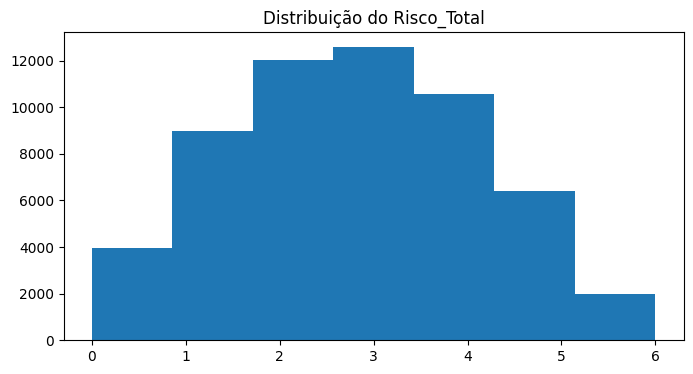

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df['risco_total'].dropna(), bins=7)
plt.title('Distribuição do Risco_Total')
plt.show()